## National Institute of Technology Karnatata, Surathkal
## Department of Electronics and Communication Engg.

## Deep Learning Lab

###### Authors : Anirudh BH (16EC105), Manan Sharma (16EC118)

In [1]:
import cv2
import numpy as np
from scipy.linalg import toeplitz
import matplotlib.pyplot as plt

# Doubly Block Toeplitz Linear 2D Convolution

Write python from scratch for 2D Doubly Block Toeplitz convolution between input=np.array([[1,2,3],[4,5,6],[7,8,9]])and filter= np.array([[1,2,1],[0,0,0],[-1,-2,-1]])<br/>

**Inputs:**<br/>
inp_arr : The input image in a numpy array format. Currently, only Grayscale images are accepted.<br/>
kernel  : Filter with which the input must be convolved with.<br/>

**Output:**<br/>
out : The output of the 2D linear convolution.<br/>

**Operation:**<br/>
1) Convertes the kernel into a Doubly Block Toeplitz Matrix. <br/>
2) The Input is Linearized and a Matrix Multiplication is performed (kernel_mat @ flatten_img). <br/>
3) The obtained output(flattened) is reshaped and returned. <br/>

In [2]:
def Doubly_Block_Toeplitz_Linear_Conv2D(inp_arr, kernel):
    # Required for the final reshaping after the matmul
    op_dim = np.array(inp_arr.shape) + np.array(kernel.shape) - 1
    op_size = op_dim[0]*op_dim[1]
    
    # Padd the kernel as a pre-processing step before the conversion to a 
    kernel = np.pad(kernel,((0,inp_arr.shape[0]-1),(0,inp_arr.shape[1]-1)), mode='constant', constant_values=0)
    
    # Prepare the Individual Toepltiz Matrices from each of the column vectors
    toeplitz_list = []
    for i in range(0,kernel.shape[0]):
        row_toeplitz = np.zeros(inp_arr.shape[1])
        row_toeplitz[0] = kernel[i,0]
        toeplitz_list.append(toeplitz(kernel[i],r=row_toeplitz))
    # Pre pare the first Macro Coulmn of the Doubly Block Toeplitz Matrix
    # Marco Column : The column consists of Matrices as it elements instead of scalars
    toeplitz_list = np.concatenate(toeplitz_list)
    
    doubly_block = np.zeros((op_size,inp_arr.size),dtype=np.int8)
    roll_factor = len(kernel)
    column_factor = inp_arr.shape[1]
    for i in range(len(inp_arr)):
        i_ = i * column_factor
        doubly_block[:,i_:i_+column_factor] = toeplitz_list
        toeplitz_list = np.roll(toeplitz_list, roll_factor, axis=0)
    # Flatten the input for MatMul
    inp_arr_flat = inp_arr.ravel()
    # Matrix Multiplication of the kernel matrix and the flattened input
    out = doubly_block@inp_arr_flat
    # Reshape the output to the desired dimensions
    return out.reshape(op_dim) 

In [3]:
inp_arr = np.array([[1,2,3],[4,5,6],[7,8,9]])
kernel = np.array([[1,2,1],[0,0,0],[-1,-2,-1]])
print(Doubly_Block_Toeplitz_Linear_Conv2D(inp_arr, kernel))

[[  1   4   8   8   3]
 [  4  13  20  17   6]
 [  6  18  24  18   6]
 [ -4 -13 -20 -17  -6]
 [ -7 -22 -32 -26  -9]]


# Linear 2D Convolution

Write python from scratch for 2d Linear convolution between input image(lena.jpg) and  kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]]))/16 <br/>

**Inputs:**<br/>
inp_arr : The input image in a numpy array format. Currently, only Colored images are accepted. GrayScale images need to be converted to Color. <br/>
kernel  : Filter with which the input must be convolved with.<br/>

**Output:**<br/>
out : The output of the 2D linear convolution.<br/>

**Operation:**<br/>
Iterates over the kernal and the image and performs a Element-Wise Multiplication. <br/>

**Improvement:** <br/>
Remove the loops over the kernal and replace it with the np.multiply and np.sum commands

In [4]:
def Linear_Conv2D(img, kernel):
    in_m, in_n, in_z = img.shape
    ker_m, ker_n = kernel.shape
    # Calculate Output Dimensions
    out_m = in_m + ker_m - 1; out_n = in_n + ker_n - 1
    # Initialze Output to zero
    output = np.zeros((out_m, out_n, in_z))
    # Iterate over the channels
    for p in range(in_z):
        # Iterate over the output rows
        for i in range(out_m):
            # Iterate over the output columns
            for j in range(out_n):
                # Iterate over the kernel
                for r in range(ker_m):
                    for t in range(ker_n):
                        # Make sure the indicies are within range for the Numpy arrays
                        if i-r >= 0 and j-t >=0 and i-r < in_m and j-t < in_n:
                            output[i,j,p] += kernel[r,t]*img[i-r,j-t,p]
    return output

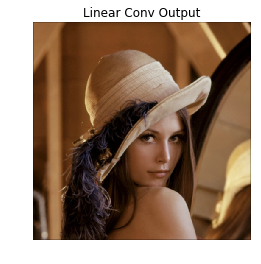

In [5]:
kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])/16
img = cv2.imread('lena.jpeg',1).astype(np.float32)/255
output_img = Linear_Conv2D(img,kernel)
# Covert BGR to RGB for plt.imshow
out_img = output_img[:,:,::-1]
plt.imshow(out_img)
plt.title('Linear Conv Output')
plt.axis('off')
plt.show()

# Implement a 2x2 Max Pool and Average Pooling

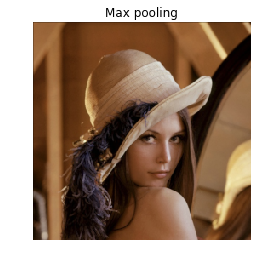

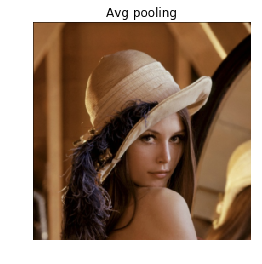

In [6]:
# Initialize 2 zero matrices
# Since we know the input size is 512x512x3, we directly define the output to be of dim 256x256x3
op_max = np.zeros((256,256,3))
op_avg = op_max.copy()

# Iterate through the channels
for k in range(op_max.shape[2]):
    # Iterate throught the rows
    for i in range(0,op_max.shape[0]):
        # Iterate through the columns
        for j in range(0,op_max.shape[1]):
            # Pick the maximum element and the average of the elements in a window of length 2x2, for each channel
            op_max[i][j][k] = np.max([out_img[2*i:2*i+2, 2*j:2*j+2, k]])
            op_avg[i][j][k] = np.sum([out_img[2*i:2*i+2, 2*j:2*j+2, k]]) / 4
            
# Plot the Max Pooling results
plt.imshow(op_max)
plt.title('Max pooling')
plt.axis('off')
plt.show()

# Plot thte Avg Pooling Results
plt.imshow(op_avg)
plt.title('Avg pooling')
plt.axis('off')
plt.show()

# Implement a 2D Spatially Seperable Convolution

Write python from scratch for 2D Spatial Separbale convolution between input image(lena.jpg) and  Gausian filter 
 = np.array([1,4,6,4,1],[4,16,24,16,4],[6,24,36,24,6],[4,16,24,16,4],[1,4,6,4,1])/256<br/>
 
 The filter can be seperated into single rank matrix. This is due to the property of the filter.<br/>
 
 2D Filter = 1D Row Filter (MatMul) 1D Column Filter

In [7]:
# kernel_before_seperation = 1/256 * np.array([[1,4,6,4,1],
#                    [4,16,24,16,4],
#                    [6,24,36,24,6],
#                    [4,16,24,16,4],
#                    [1,4,6,4,1]]) 


# full_kernel = kernel (matmul_with) kernel.T 

kernel = 1/16 * np.array([1,4,6,4,1]).reshape([-1,1])

In [8]:
lena = cv2.imread('lena.jpeg').astype(np.float32)/255

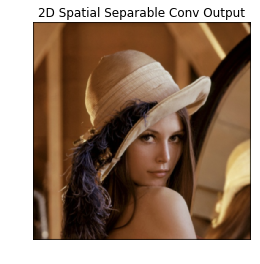

In [9]:
output_img = Linear_Conv2D(lena,kernel)
output_img = Linear_Conv2D(output_img,kernel.T)
out_img = output_img[:,:,::-1]
plt.imshow(out_img)
plt.title('2D Spatial Separable Conv Output')
plt.axis('off')
plt.show()

# Depthwise Seperable 2D Convolution

Write python from scratch for 2D Depthwise Separbale convolution between input image(lena.jpg) and depthwise filter & pointwise  filters

<br/>
depthwise filter array = np.array([[[1, 2, 1], [2, 4, 2], [1, 2, 1]], 
                     [[1, 2, 1], [2, 4, 2], [1, 2, 1]], 
                     [[1, 2, 1], [2, 4, 2], [1, 2, 1]]])/16<br/>                  
pointwise filter array= np.array([[1], [1], [1]])/512
<br/>

### Depthwise Convolution

**Inputs:**<br/>
inp_arr : The input image in a numpy array format. Currently, only Colored images are accepted. GrayScale images need to be converted to Color. <br/>
kernel  : Filter with which the input must be convolved with. Kernel channel number must be equal to input channel number<br/>

**Output:**<br/>
out : The output of the 2D Depthwise linear convolution.<br/>

**Operation:**<br/>
Iterates over the kernel and the image and performs a Element-Wise Multiplication for the 2D convolution. <br/>
The operation is similar to the Linear 2D Convolution. One modification, is the use of channels for the kernel as well

In [10]:
def Depthwise_Conv2D(img,kernel):
    in_m, in_n, in_z = img.shape
    ker_m, ker_n, ker_z = kernel.shape
    # Make sure the number of channels for the input and the output are the same
    assert in_z == ker_z, "Input Channel and Kernel Channel Size not Equal"
    # Calculate the output dimensions 
    out_m = in_m + ker_m - 1; out_n = in_n + ker_n - 1
    output = np.zeros((out_m, out_n, in_z))
    # Iterate over the channels
    for p in range(in_z):
        # Iterate over the input rows
        for i in range(out_m):
            # Iterate over the input columns
            for j in range(out_n):
                # Iterate over the kernel
                for r in range(ker_m):
                    for t in range(ker_n):
                        # Make sure the indicies are with the range of the arrays
                        if i-r >= 0 and j-t >=0 and i-r < in_m and j-t < in_n:
                            output[i,j,p] += kernel[p,r,t]*img[i-r,j-t,p]
    return output

In [11]:
lena = cv2.imread('lena.jpeg').astype(np.float32)/255

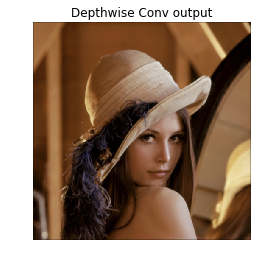

In [12]:
depth_array =  np.array([[[1, 2, 1], [2, 4, 2], [1, 2, 1]], [[1, 2, 1], [2, 4, 2], [1, 2, 1]], [[1, 2, 1], [2, 4, 2], [1, 2, 1]]])/16 

depth_output_img = Depthwise_Conv2D(lena,depth_array)
plt.imshow(depth_output_img[:,:,::-1])
plt.title('Depthwise Conv output')
plt.axis('off')
plt.show()

### Pointwise Convolution

**Inputs:**<br/>
inp_arr : The input image in a numpy array format. Currently, only Colored images are accepted. GrayScale images need to be converted to Color. <br/>
kernel  : Filter with which the input must be convolved with. Kernel channel number must be equal to input channel number<br/>

**Output:**<br/>
out : The output of the 2D Pointwise linear convolution.<br/>

**Operation:**<br/>
Iterates over the kernel and the image and performs a Element-Wise Multiplication for the 2D convolution. <br/>
The operation is similar to the Linear 2D Convolution. One modification, is the use of channels for the kernel as well.<br/>
The kernel  used here is has the dimensions 1 x 1 x out_channels

In [13]:
def Pointwise_Conv2D(img,kernel):
    in_m, in_n, in_z = img.shape
    ker_m, ker_z = kernel.shape
    # Make sure the number of channels for the input and the output are the same
    assert in_z == ker_z, "Input Channel and Kernel Channel Size not Equal"
    # Output height and the width are kept the same as input height and width
    output = np.zeros((in_m, in_n, 1))
    # Iterate over the channels and calculate the pint wise product of the elements
    for p in range(in_z):
        output += kernel[0,p]*img[:,:,p].reshape(in_m,in_n,1)
    return output

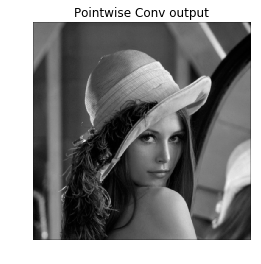

In [14]:
pointwise_array = (np.array([[1], [1], [1]])/512).T
pointwise_output_img = Pointwise_Conv2D(depth_output_img,pointwise_array)
out_img = np.squeeze(pointwise_output_img[:,:,::-1])

plt.imshow(out_img, cmap='gray')
plt.title('Pointwise Conv output')
plt.axis('off')
plt.show()

# Dilated Convolution

Write python from scratch for 2D Atrous/Dilated cnvolution between input image(lena.jpg) and filter which is given below with rate 3:
<br/>
filter= np.array([[1, 2, 1],[2, 4, 2], [1, 2, 1]])/16
<br/>                  

**Inputs:**<br/>
inp_arr : The input image in a numpy array format. Currently, only Colored images are accepted. GrayScale images need to be converted to Color. <br/>
kernel  : Filter with which the input must be convolved with. Kernel channel number must be equal to input channel number<br/>
rate    : The Rate of dilation for the kernel.

**Output:**<br/>
out : The output of the 2D Pointwise linear convolution.<br/>

**Operation:**<br/>
Iterates over the kernel and the image and performs a Element-Wise Multiplication for the 2D convolution. <br/>
The operation is similar to the Linear 2D Convolution. One modification, is the use of of a dilation factor to increase the filter area.<br/>

In [15]:
def Dilated_Conv2D(img, kernel,rate):
    in_m, in_n, in_z = img.shape
    ker_m, ker_n = kernel.shape
    # Calculate the output dimensions
    out_m = in_m + ker_m - 1; out_n = in_n + ker_n - 1
    output = np.zeros((out_m, out_n, in_z))
    # Iterate over the Channels
    for p in range(in_z):
        # Iterate over the output rows
        for i in range(out_m):
            # Iterate over the output columns
            for j in range(out_n):
                # Iterate over the Kernel
                for r in range(ker_m):
                    for t in range(ker_n):
                        # Make sure the dialted indicies are within the Numpy array index range
                        if i-rate*r >= 0 and j-rate*t >=0 and i-rate*r < in_m and j-rate*t < in_n:
                            output[i,j,p] += kernel[r,t]*img[i-rate*r,j-rate*t,p]
    return output

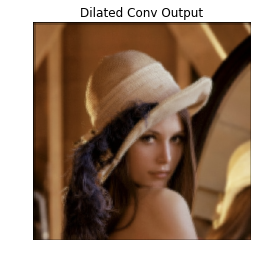

In [16]:
kernel = np.array([[1, 2, 1],[2, 4, 2],[1, 2, 1]])/16
img = cv2.imread('lena.jpeg',1).astype(np.float32)/255
rate = 3
output_img = Dilated_Conv2D(img,kernel,rate)
out_img = output_img[:,:,::-1]
plt.imshow(out_img)
plt.title('Dilated Conv Output')
plt.axis('off')
plt.show()